# CLASSIFICATION ANALYSIS ON YEARLY INCOME DATASET.

<a id="pb"> </a>
## 1.Problem Statement

The average income of a person in any country is determined by number of factors such as Age, Educational level, Occupation, Economy of the country, etc. A similar dataset has been taken by us containing records of US indiviuals. The problem statement here is to determine whether an indiviual earns more than 50,000 US Dollars or less than 50,000 US Dollars. Assumptions made for the following dataset is that the data provided is for One year and currency is US Dollars.

## 2. Use Case: Targeted Advertising with Customer Questionnaire

### Description:

Company XYZ is preparing to launch two new products: a premium product and an ordinary product. To maximize their marketing efforts and ensure effective targeting, they decide to conduct a customer questionnaire campaign followed by targeted promotion using an AI-powered model.

<a id="dd"></a>
## 3.Data Definition

**1.Age:** Age of the indiviual in years.(Numeric)

**2.Workclass:** Type of organisation indiviual is working for-Government, Private or Self-Employed.(Categoric)

**3.fnlwgt:** Final weight as assigned by central beareu(Non-standarised data), classify the indiviuals into groups. It means that indiviuals having same fnlwgt have same characteristics and likely to be of same class.(Numeric)

**4:Education:** Education level of the indiviual.(Categoric)

**5:Educational Number:** Classifying Education level with numbers.(Numeric)

**6:Marital status:** Marital status of the indiviual.(Categoric)

**7:Occupation:** Work done by the indiviual.(Categoric)

**8:Relationship:** Position held by the person in the family.(Categoric)

**9:Race:** Black or White.(Categoric)

**10:Gender:** Male or female.(Categoric)

**11:Capital-loss / Capital-gain:** Capital loss or gained in that year.(Numeric)

**12:Hours-per-Week:** Working hours in a week.(Numeric)

**13:Native-country:** Could be US or minority.(Numeric)


### Tools Used:

**Python**,  **Numpy**,  **Pandas**,  **Scikit-learn**,  **Matplotlib**,  **Seaborn**


<a id="il"></a>
## 4.Importing Libraries

In [3]:
#Numpy for array and lists, pandas for data manipulation.
import pandas as pd
import numpy as np

#Matplotlib and seaborn to plot the graphs and gaining insights.
import matplotlib.pyplot as plt
import seaborn as sns

#Scikit-learn to use KNN Algorithm in our data.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder


import warnings
warnings.filterwarnings('ignore')

#to get consistent results.
import random
random.seed(0)



<a id="ed"></a>
## 5.Exploring the Dataset

**Problem:** What are the properties of data?

In [4]:
#Reading the file.
data=pd.read_csv('Income_data (2).csv')

#Previewing the files and columns of the dataset.
data.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
#Finding the shape of the dataset i.e. Number of rows and columns.
data.shape

(48842, 15)

**Inference:** The dataset contains 48,842 rows and 15 columns, hence the rows and columns ratio is adequate. It is seen that 14 factors contribute to the income of an indiviual in USA. We'll explore the data to validate our Hypothesis.

In [6]:
#Further information about the datatypes,null values and total values present in the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


There are 6 Numeric columns and 9 categorical columns. Columns are classified into correct datatype, therefore no need to change them.

In [7]:
#To know the properties of the data where the datatype is Categorical.
data.describe(include=object)

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [8]:
#To know the properties of Numeric columns.
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


**Inference:** The data shows that working class in US population is majorly consists of male and is between 17-90 years with an median age of 37 years.The mean working hours per week is 40 and indiviuals are employed by Private organisation. The maximum number of people are educated till High-School, are married and native white Americans. The important take-away is 76% of the population earns less than 50,000 US Dollars per year.

<a id="hmv"></a>
### 6.Handling Missing values

In [9]:
#Checking null values
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

**Inference:** Python shows that no null values are present in the data but upon closer inspection of the file, we can see that the null values are present in Non-standard form i.e. as '?' and are not detected. Therefore, has to be replced with 'NaN'.  

In [10]:
#replacing '?' with Null values.
data['workclass']=data['workclass'].replace('?',np.nan)
data['occupation']=data['occupation'].replace('?',np.nan)
data['native-country']=data['native-country'].replace('?',np.nan)
data.head()
#we can see that in row 4th, values are replaced.

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [11]:
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [12]:
#since the null values are categorical variables, hence filling it with mode value of every column
#Permanently changing it in the dataframe.
data['workclass'].fillna(data['workclass'].mode()[0],inplace=True)  #filling with highest occuring value.
data['occupation'].fillna(data['occupation'].mode()[0],inplace=True)
data['native-country'].fillna(data['native-country'].mode()[0],inplace=True)
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


<a id="ss"></a>
## 7.Statistical Summary

##### 1. Bivariate analysis of Numerical columns using Correlation.

In [13]:
#Storing all numerical columns in a variable
numeric_col=data.select_dtypes(include=np.number)
#Finding the correlation between the columns
corr=numeric_col.corr()
#Printing the values
numeric_col.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


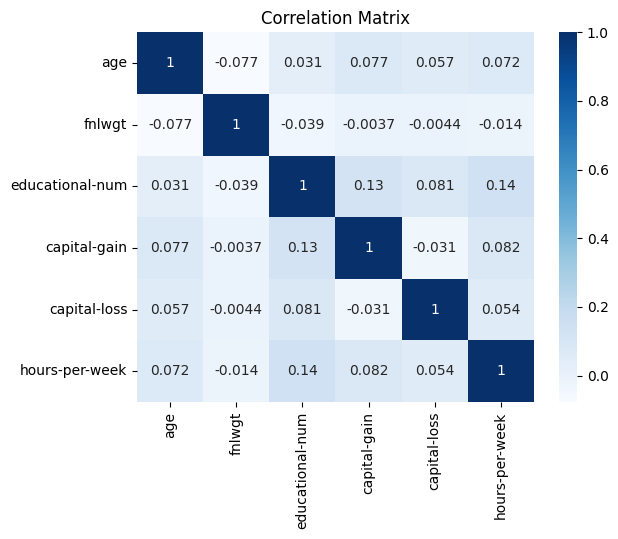

In [14]:

sns.heatmap(corr,annot=True,cmap='Blues',fmt='.2g')
plt.title('Correlation Matrix');

**Inference:** Since Fnlwgt has negative and very small correlation with all other columns, therefore it will be better suited to drop it. Similar case applies to capital loss and capital gain. 

##### 2. Bivariate analysis for categorical columns.

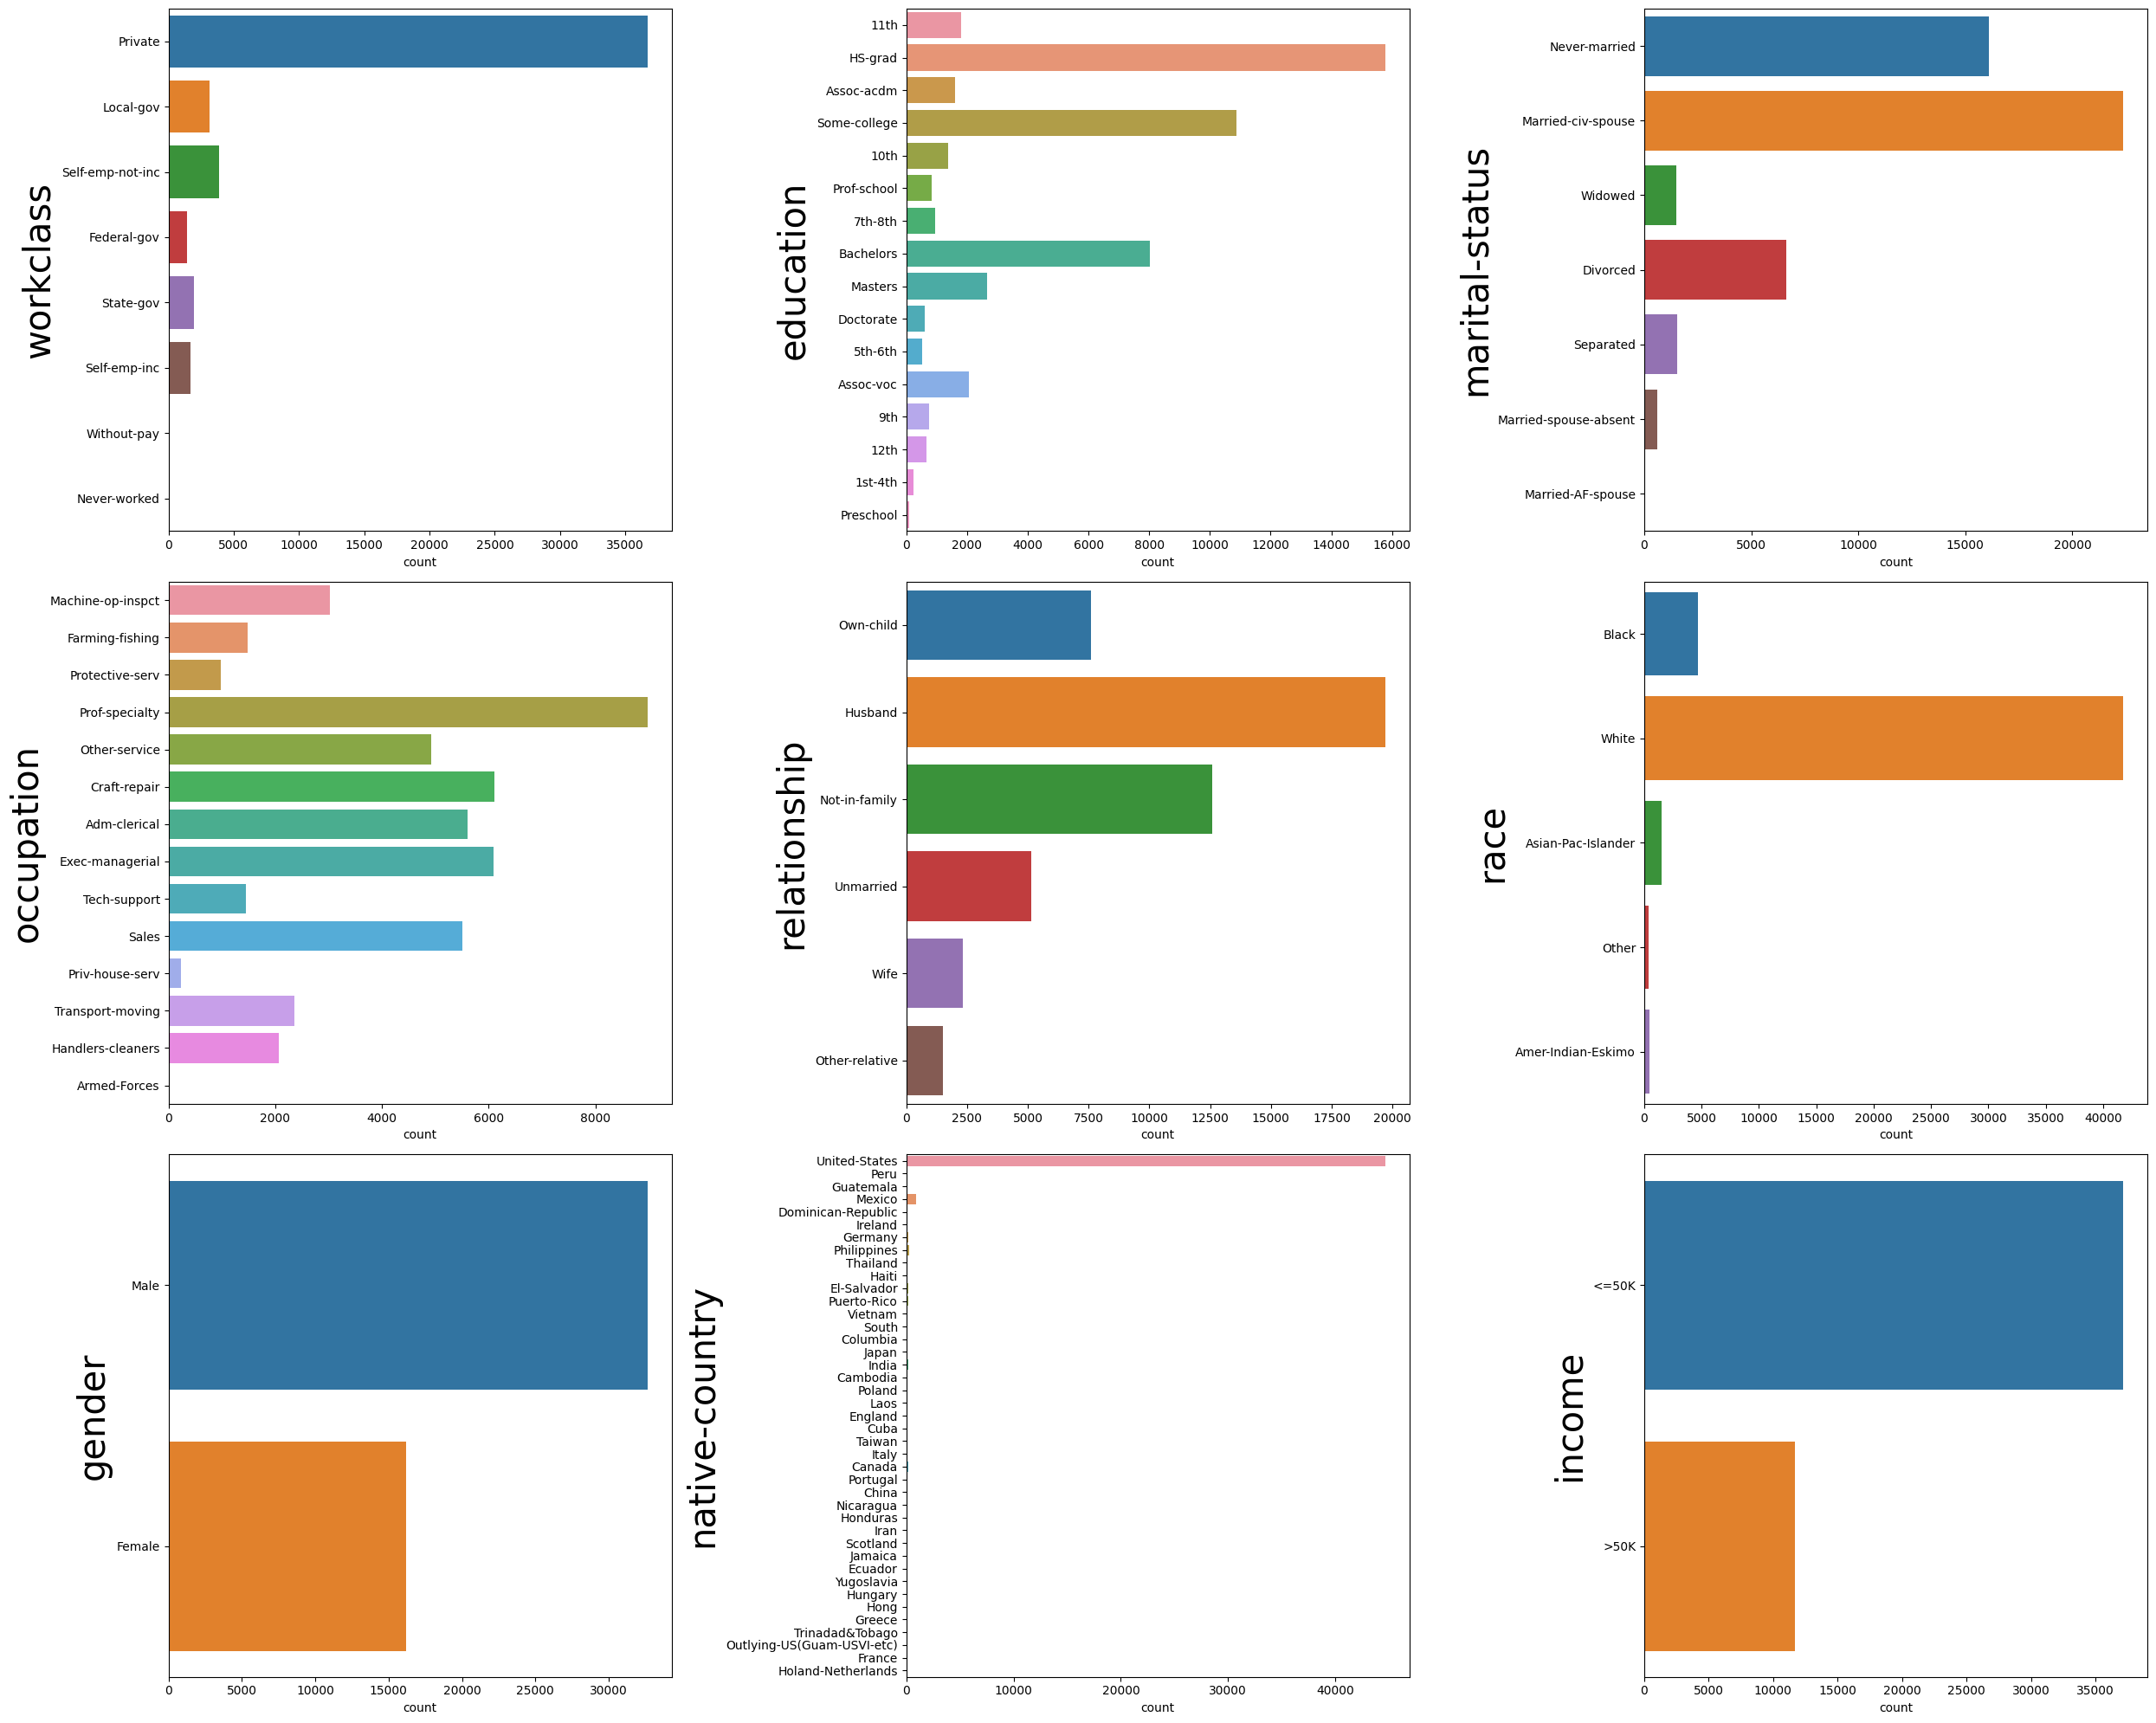

In [15]:
#creating a list of all categorical columns.
cat_col=data.select_dtypes(include=object)
fig,ax = plt.subplots(3,3,figsize=(25,20))

#running a loop to plot all the categorical-count.
for variable,subplot in zip(cat_col,ax.flatten()):
    countplot=sns.countplot(y=data[variable], ax=subplot)
    #naming the plot as the column-name.
    countplot.set_ylabel(variable, fontsize=30)
    
plt.tight_layout()
#printing the plot.
plt.show()


Since, our target variable is income therefore, we are more interested to see its relation with **Age**, **Education level**, **Work-hour**, **Work-class**  and **Occupation**.

<a id="atf"></a>
## 8.Analyzing Relationship between Target and Features Columns.

#### 1. Distribution of Target variable in Data.

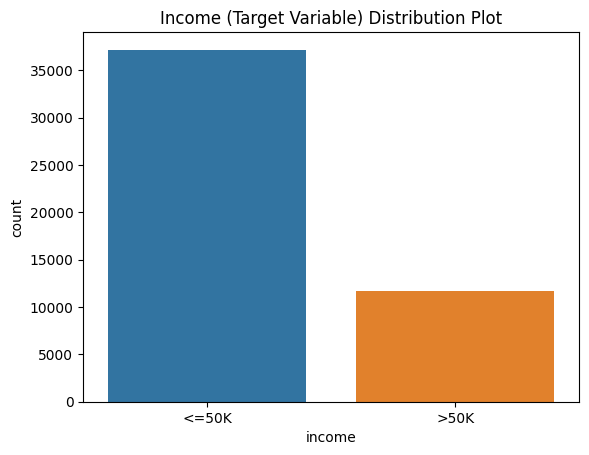

In [16]:
#Count of people earning more and less than $50,000 per year.
sns.countplot(data,x='income')
plt.title('Income (Target Variable) Distribution Plot')
plt.ylabel('count')

plt.show()


Text(0, 0.5, 'count')

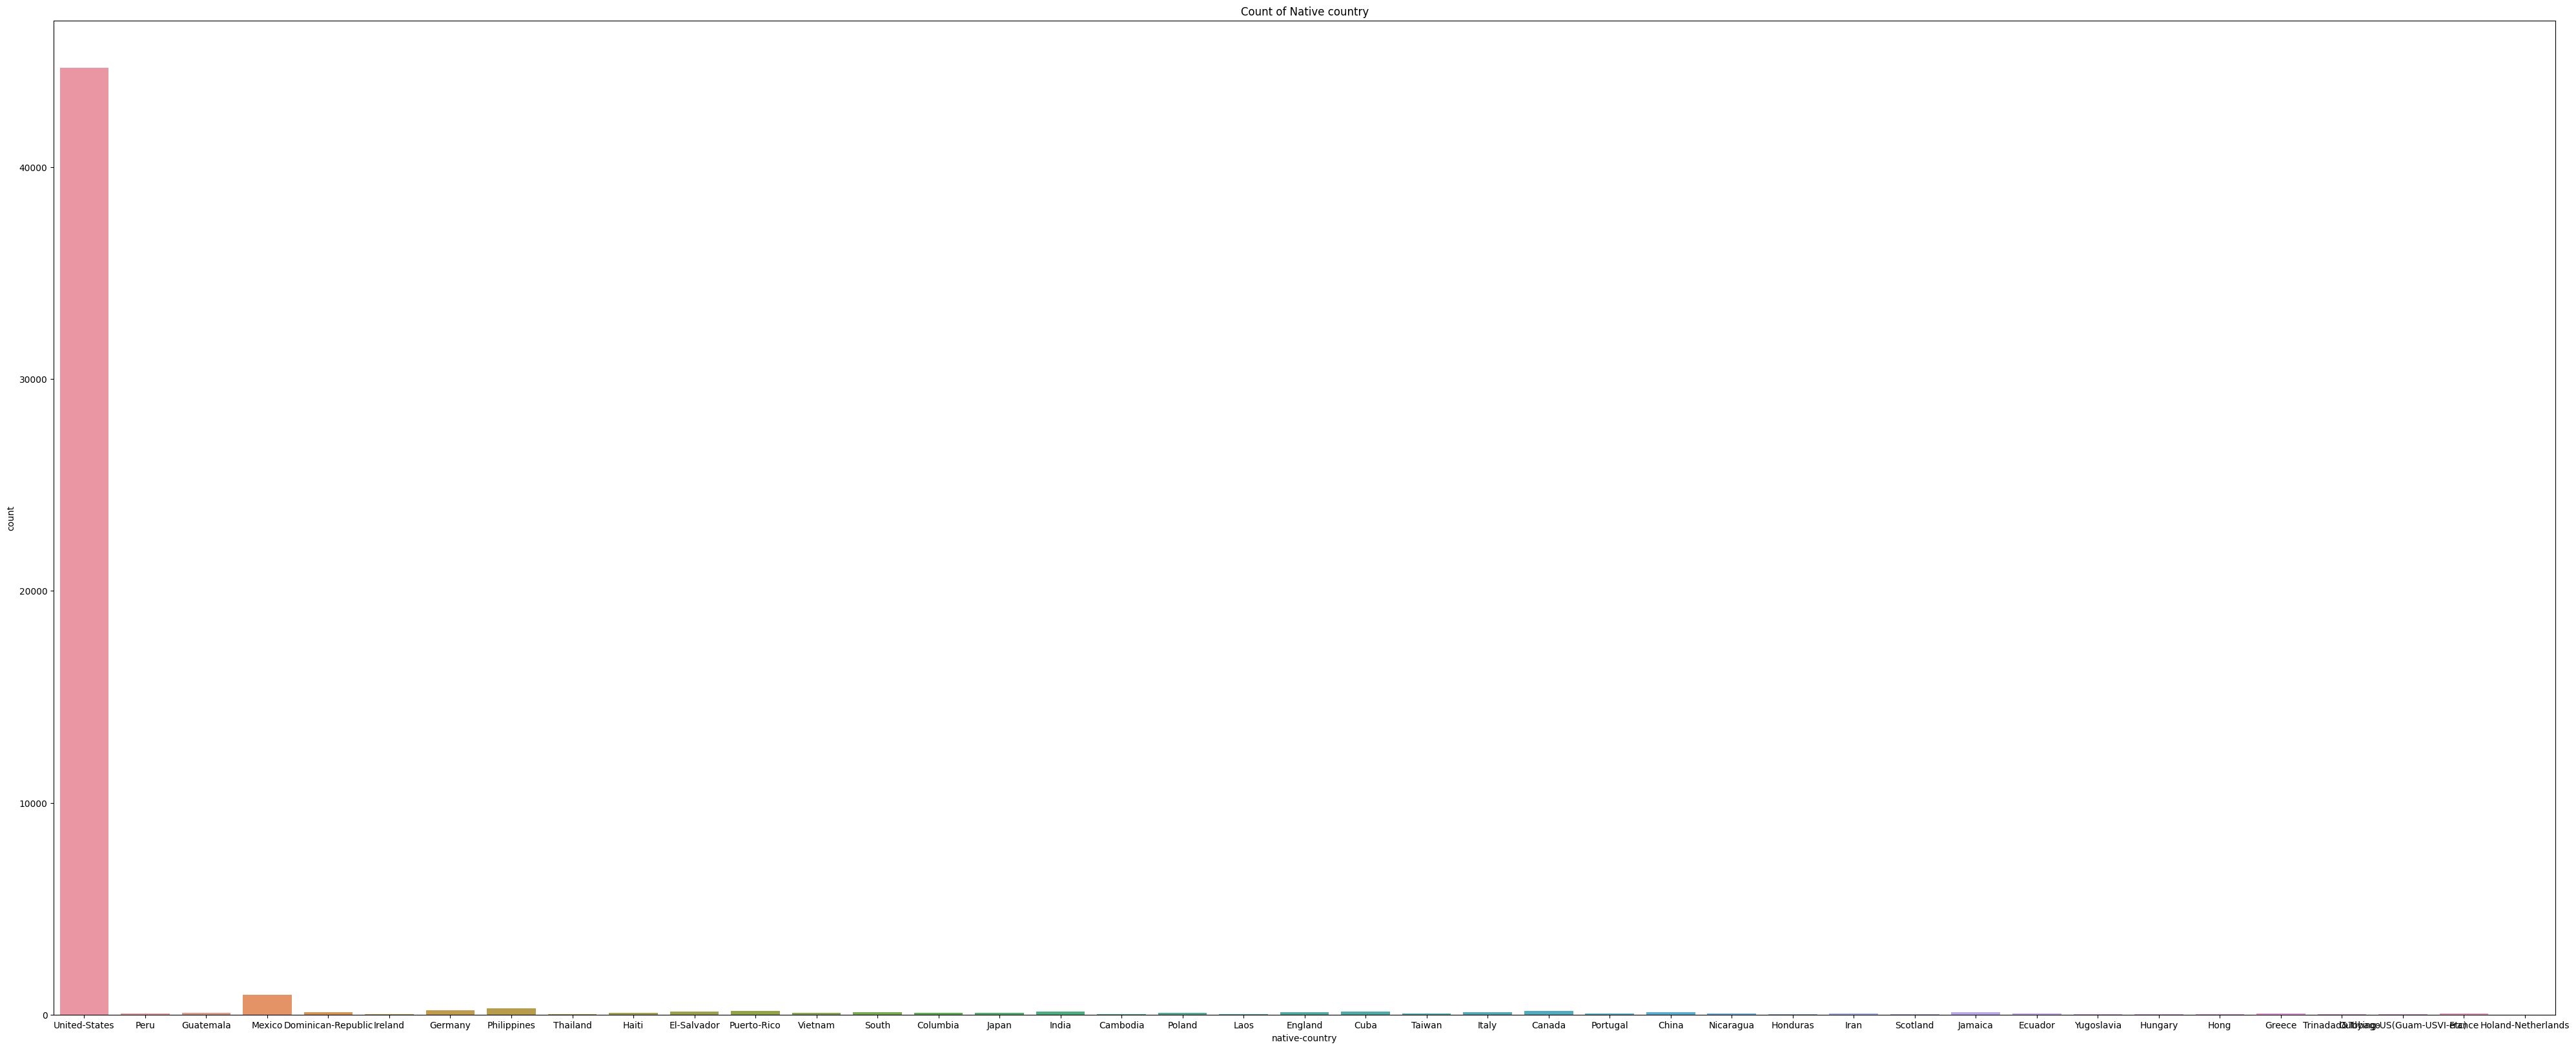

In [17]:
plt.figure(figsize=(50,20))
sns.countplot(data,x='native-country',orient="h")
plt.title('Count of Native country')
plt.ylabel('count')
#count of countries other than US is very less(insignificant)

#### 2. Income VS Age:

<function matplotlib.pyplot.show(close=None, block=None)>

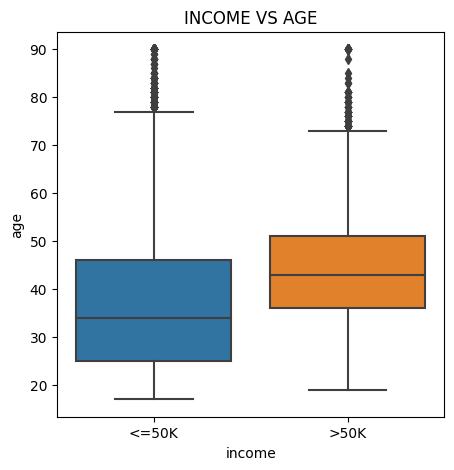

In [18]:
# our inference is that variable should be age,education,workclass,occupation and hours per week.
# to verify this, we will plot the graph of each label with target variable.
# age vs Income
grp1=plt.figure(figsize=(5,5))
sns.boxplot(x='income',y='age',data=data)
plt.title('INCOME VS AGE')
plt.show

# there are many outliers in the upper end

#### 3. Income VS Education

<function matplotlib.pyplot.show(close=None, block=None)>

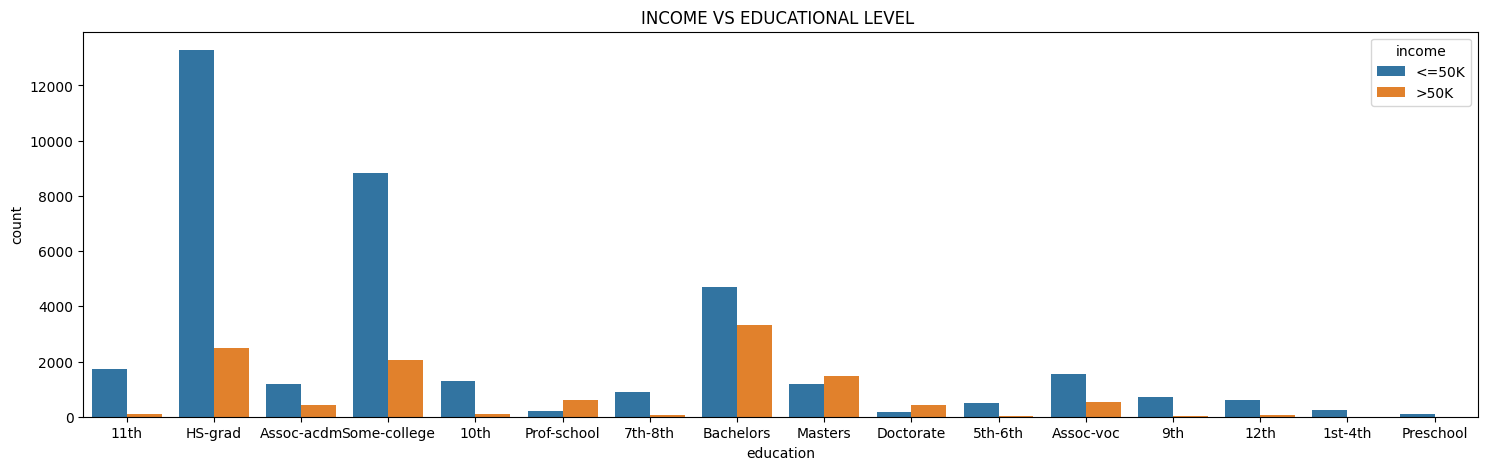

In [19]:
# education vs income
grp2=plt.figure(figsize=(18,5))
sns.countplot(x='education',hue='income',data=data)
plt.title('INCOME VS EDUCATIONAL LEVEL ')
plt.show

# in all educational levels except masters and doctorate count of more than 50K USD earner is less
# there is huge gap in count of two income classes in highschool, some college
# least gap in count of two income classes is in bachelors and masters 

#### 4. Income VS Occupation

<function matplotlib.pyplot.show(close=None, block=None)>

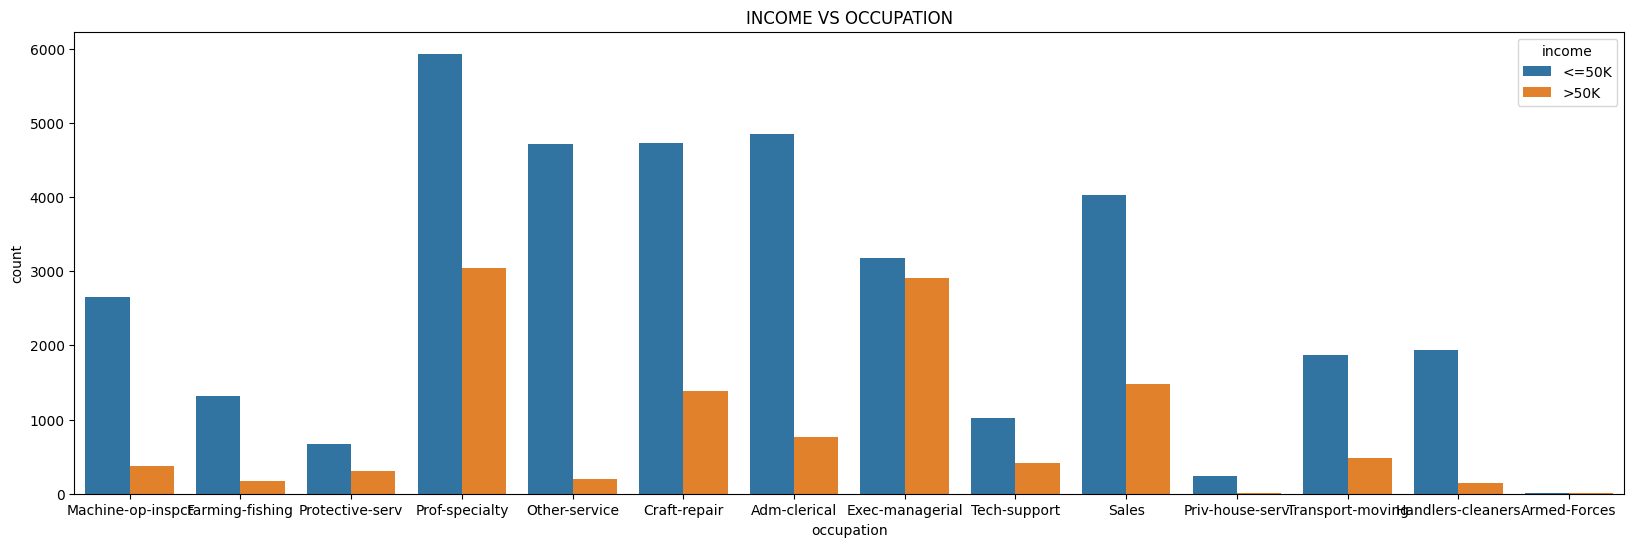

In [20]:
#income vs occupation
grp3=plt.figure(figsize=(20,6))
sns.countplot(x='occupation',hue='income',data=data)
plt.title('INCOME VS OCCUPATION')
plt.show

# in all occupations count of more than 50K USD earner is less
# there is huge gap in count of two income classes in other services
# least gap in count of two income classes is in Machine-op-inspct

#### 5. Income VS Work Hours-per-week

<function matplotlib.pyplot.show(close=None, block=None)>

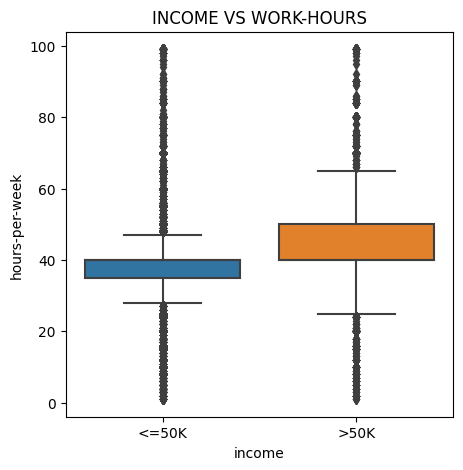

In [21]:
grp4=plt.figure(figsize=(5,5))
sns.boxplot(x='income',y='hours-per-week',data=data)
plt.title('INCOME VS WORK-HOURS')
plt.show

# there are many outliers on both the ends

#### 6. Income VS Work class.

<function matplotlib.pyplot.show(close=None, block=None)>

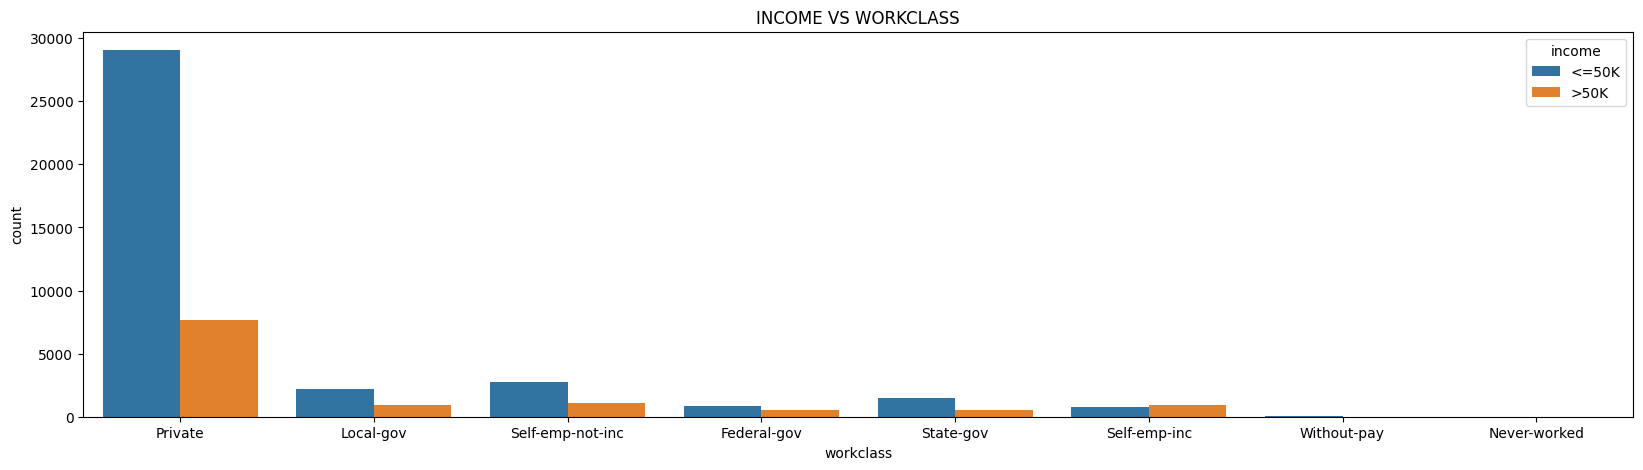

In [22]:
#income vs workclass
grp5=plt.figure(figsize=(20,5))
sns.countplot(x='workclass',hue='income',data=data)
plt.title('INCOME VS WORKCLASS')
plt.show

# private workclass has huge gap in count of both the income classes

<a id="ff"></a>
## 9.Feature Engineering

As shown in EDA above, except for columns like Age, Workclass, Education, Occupation and hours-per-week, all other columns does not show any considerable effect on Income. Therefore, following changes has been made in the dataframe.

In [23]:
#Currently our data looks like this.
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


In [24]:
# education number 
df=data.drop(['education','income'],axis=1)

In [25]:
y=data.income

In [26]:
X_train,X_test,y_train,y_test = train_test_split(df,y,test_size=0.2,random_state=2)
X_train.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
2397,54,Private,220115,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1628,40,United-States
19951,31,Private,226883,9,Divorced,Prof-specialty,Own-child,White,Male,0,0,75,United-States
3663,46,Local-gov,127441,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States
39449,22,Private,54825,9,Never-married,Sales,Not-in-family,White,Male,0,0,40,United-States
30655,34,Private,324654,9,Never-married,Machine-op-inspct,Own-child,Asian-Pac-Islander,Male,0,0,40,China


In [27]:
# doing label encoding as these variables have order
labelencoder = LabelEncoder()
y_train = labelencoder.fit_transform(y_train)
y_test=labelencoder.fit_transform(y_test)
y_train,y_test

(array([0, 0, 1, ..., 0, 1, 0]), array([0, 0, 0, ..., 0, 0, 1]))

In [28]:
feat_cat = X_train.loc[:, ['workclass','occupation','race','gender','marital-status']]
feat_cat1=X_test.loc[:, ['workclass','occupation','race','gender','marital-status']]

In [57]:
# Create an instance of the OneHotEncoder
OHE = OneHotEncoder(drop='first')

# Fit and transform the categorical features
X_train_encoded = OHE.fit_transform(feat_cat)
X_test_encoded = OHE.fit_transform(feat_cat1)
# Convert the sparse matrix to a dense array
X_train_dense = X_train_encoded.toarray()
X_test_dense = X_test_encoded.toarray()
# Create a DataFrame with the encoded columns
X_train_new = pd.DataFrame(X_train_dense, columns=OHE.get_feature_names_out())
X_test_new = pd.DataFrame(X_test_dense, columns=OHE.get_feature_names_out())
X_train_new.head()

,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,...,race_Black,race_Other,race_White,gender_Male,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [30]:
# Reset the indices of the DataFrames
X_train.reset_index(drop=True, inplace=True)
X_train_new.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
X_test_new.reset_index(drop=True, inplace=True)
# Concatenate the DataFrames along rows (axis=0)
X_train2 = pd.concat([X_train,X_train_new], axis=1)
X_test2 = pd.concat([X_test,X_test_new], axis=1)
# Print the concatenated DataFrame
X_train=X_train2
X_test=X_test2

In [31]:
data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [32]:
data.corr(numeric_only=True)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


In [33]:
#no of rows in capital columns with no values
#therefore can be dropped
count1 = (data['capital-loss'] == 0).sum()
print("Number of rows with value 0 in capital_loss:", count1)
count2 = (data['capital-gain'] == 0).sum()
print("Number of rows with value 0 in capital_gain:", count2)

Number of rows with value 0 in capital_loss: 46560
Number of rows with value 0 in capital_gain: 44807


In [34]:
#dropping redundant columns
#1.education is similar to education number
#2.relationship and finalwt are non explanatory 
#3.native country is highly imbalanced

data=data.drop(columns=['fnlwgt','education','relationship','capital-loss','capital-gain','native-country'])
data.head()

,age,workclass,educational-num,marital-status,occupation,race,gender,hours-per-week,income
0,25,Private,7,Never-married,Machine-op-inspct,Black,Male,40,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,White,Male,50,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,White,Male,40,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Black,Male,40,>50K
4,18,Private,10,Never-married,Prof-specialty,White,Female,30,<=50K


In [36]:
X_train=X_train.drop(['workclass','fnlwgt','relationship','race','gender','capital-gain','capital-loss','native-country','occupation','marital-status'],axis=1)
X_test=X_test.drop(['workclass','fnlwgt','relationship','race','gender','capital-gain','capital-loss','native-country','occupation','marital-status'],axis=1)

# MODEL BUILDING

# 1. KNN Classifier

In [40]:
#fitting the model

Accuracy_Train=[]
Accuracy_Test=[]
Recall_Train=[]
Recall_Test=[]
Precision_Train=[]
Precision_Test=[]
AUC_ROC_train=[]
AUC_ROC_test=[]
k=[]
for i in range(3,10,2):
    knn_class = KNeighborsClassifier(n_neighbors=i)
    knn_class.fit(X_train, y_train)
    
    #predicting on the train ,test data
    knn_train_preds = knn_class.predict(X_train)
    knn_test_preds = knn_class.predict(X_test)
    
    # check accuracy for train and test dataset
    knn_train_accuracy=accuracy_score(y_train, knn_train_preds)
    knn_test_accuracy=accuracy_score(y_test, knn_test_preds)
    Accuracy_Train.append(knn_train_accuracy)
    Accuracy_Test.append(knn_test_accuracy)
    
    # check recall for train and test dataset
    knn_train_recall=recall_score(y_train, knn_train_preds)
    knn_test_recall=recall_score(y_test, knn_test_preds)
    Recall_Train.append(knn_train_recall)
    Recall_Test.append(knn_test_recall)
    
    # check precision score for train and test 
    knn_train_precision=precision_score(y_train, knn_train_preds)
    knn_test_precision=precision_score(y_test, knn_test_preds)
    Precision_Train.append(knn_train_precision)
    Precision_Test.append(knn_test_precision)
    
    # check auc roc curve
    knn_train_auc = roc_auc_score(y_train, knn_class.predict_proba(X_train)[:,1])
    knn_test_auc = roc_auc_score(y_test, knn_class.predict_proba(X_test)[:,1])
    AUC_ROC_train.append(knn_train_auc)
    AUC_ROC_test.append(knn_test_auc)
    k.append(i)

knn_res=pd.DataFrame({'k':k,'Accuracy Train':Accuracy_Train,'Accuracy Test':Accuracy_Test,'Recall Train':Recall_Train,'Recall test':Recall_Test,
                     'Precision train':Precision_Train,'Precision test':Precision_Test,'AUC_ROC train':AUC_ROC_train,'AUC_ROC test':AUC_ROC_test})
knn_res

# taking less error with consistency in train and test is achieved at k=5

,k,Accuracy Train,Accuracy Test,Recall Train,Recall test,Precision train,Precision test,AUC_ROC train,AUC_ROC test
0,3,0.882092,0.794452,0.726789,0.562527,0.769821,0.562527,0.935672,0.792556
1,5,0.864689,0.802539,0.671635,0.547712,0.741159,0.585196,0.921657,0.821008
2,7,0.855015,0.806633,0.645656,0.549020,0.721819,0.596026,0.913371,0.833452
3,9,0.849461,0.808373,0.627023,0.544662,0.712264,0.601830,0.907412,0.842284


In [41]:
knn_model= KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_train_preds = knn_model.predict(X_train)
knn_test_preds = knn_model.predict(X_test)
knn_train_accuracy=0.864689
knn_test_accuracy=0.802539
knn_train_recall=0.671635
knn_test_recall=0.547712
knn_train_precision=0.741159
knn_test_precision=0.585196
knn_train_auc=0.921657
knn_test_auc=0.821008

<function matplotlib.pyplot.show(close=None, block=None)>

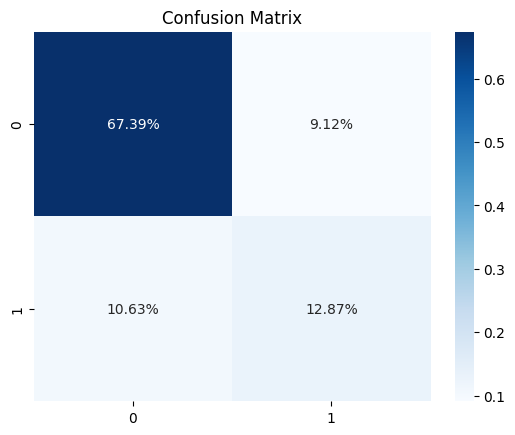

In [43]:

cf=confusion_matrix(y_test,knn_test_preds)
sns.heatmap((cf)/np.sum(cf),annot=True,  fmt='0.2%',cmap='Blues')
plt.title('Confusion Matrix')
plt.show

# 2. Decision Tree

In [44]:
#fitting the model
Accuracy_Train=[]
Accuracy_Test=[]
Recall_Train=[]
Recall_Test=[]
Precision_Train=[]
Precision_Test=[]
AUC_ROC_train=[]
AUC_ROC_test=[]
depth=[]

for i in range(3,20):
    dt_class = DecisionTreeClassifier(criterion='entropy',max_depth=i)
    dt_class.fit(X_train, y_train)
    
    #predicting on the train ,test data
    dt_train_preds = dt_class.predict(X_train)
    dt_test_preds = dt_class.predict(X_test)
    
    # check accuracy for train and test dataset
    dt_train_accuracy=accuracy_score(y_train, dt_train_preds)
    dt_test_accuracy=accuracy_score(y_test, dt_test_preds)
    Accuracy_Train.append(dt_train_accuracy)
    Accuracy_Test.append(dt_test_accuracy)
    
    # check recall for train and test dataset
    dt_train_recall=recall_score(y_train, dt_train_preds)
    dt_test_recall=recall_score(y_test, dt_test_preds)
    Recall_Train.append(dt_train_recall)
    Recall_Test.append(dt_test_recall)
    
    # check precision score for train and test 
    dt_train_precision=precision_score(y_train, dt_train_preds)
    dt_test_precision=precision_score(y_test, dt_test_preds)
    Precision_Train.append(dt_train_precision)
    Precision_Test.append(dt_test_precision)
    
    # check auc roc curve
    dt_train_auc = roc_auc_score(y_train, dt_class.predict_proba(X_train)[:,1])
    dt_test_auc = roc_auc_score(y_test, dt_class.predict_proba(X_test)[:,1])
    AUC_ROC_train.append(dt_train_auc)
    AUC_ROC_test.append(dt_test_auc)
    depth.append(i)

dt_res=pd.DataFrame({'depth':depth,'Accuracy Train':Accuracy_Train,'Accuracy Test':Accuracy_Test,'Recall Train':Recall_Train,'Recall test':Recall_Test,
                     'Precision train':Precision_Train,'Precision test':Precision_Test,'AUC_ROC train':AUC_ROC_train,'AUC_ROC test':AUC_ROC_test})
dt_res

# balance of these evaluation parameters with consistency in train and test is achieved at depth=13

,depth,Accuracy Train,Accuracy Test,Recall Train,Recall test,Precision train,Precision test,AUC_ROC train,AUC_ROC test
0,3,0.821334,0.821578,0.391610,0.375599,0.743782,0.735495,0.850809,0.846821
1,4,0.823024,0.823421,0.387883,0.370806,0.757538,0.751767,0.866144,0.861281
2,5,0.824815,0.824752,0.408752,0.391285,0.748197,0.740313,0.875326,0.869921
3,6,0.832723,0.828027,0.484774,0.452723,0.728480,0.710185,0.882700,0.873937
4,7,0.836050,0.829768,0.477641,0.444880,0.749415,0.724113,0.888770,0.876901
5,8,0.840504,0.834988,0.600830,0.575599,0.694438,0.674324,0.894631,0.875992
6,9,0.844112,0.835398,0.612010,0.580828,0.701403,0.673573,0.900763,0.874180
7,10,0.847747,0.837343,0.620528,0.586492,0.709607,0.677744,0.907508,0.868168
8,11,0.851765,0.833453,0.625532,0.576471,0.720859,0.668857,0.913842,0.862324
9,12,0.856781,0.829153,0.654919,0.592593,0.723137,0.649475,0.921166,0.853236


In [45]:
dt_model= DecisionTreeClassifier(criterion='entropy',max_depth=13)
dt_model.fit(X_train, y_train)
dt_train_preds = dt_class.predict(X_train)
dt_test_preds = dt_class.predict(X_test)
dt_train_accuracy=0.863102
dt_test_accuracy=0.829972
dt_train_recall=0.621380
dt_test_recall=0.543791
dt_train_precision=0.764976
dt_test_precision=0.670247
dt_train_auc=0.929037
dt_test_auc=0.848552

<function matplotlib.pyplot.show(close=None, block=None)>

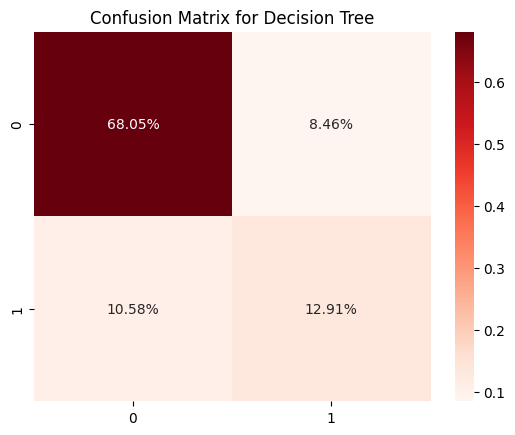

In [46]:
cf1=confusion_matrix(y_test,dt_test_preds)
sns.heatmap((cf1)/np.sum(cf1),annot=True,  fmt='0.2%',cmap='Reds')
plt.title('Confusion Matrix for Decision Tree')
plt.show

# 3. Logistic Regression

In [47]:
# Train logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [48]:
#evaluate model performnance on train and test 
lr_train_pred = lr_model.predict(X_train)
lr_test_pred=lr_model.predict(X_test)

In [49]:
# check accuracy for train and test 
lr_train_accuracy=accuracy_score(y_train, lr_train_pred)
lr_test_accuracy=accuracy_score(y_test, lr_test_pred)
lr_train_accuracy,lr_test_accuracy

(0.8320579428249687, 0.8291534445695568)

In [50]:
# check precision score for train and test 
lr_train_precision=precision_score(y_train, lr_train_pred)
lr_test_precision=precision_score(y_test, lr_test_pred)
lr_train_precision,lr_test_precision

(0.6870703331570598, 0.6712253829321663)

In [51]:
# check recall score for train and test 
lr_train_recall=recall_score(y_train, lr_train_pred)
lr_test_recall=recall_score(y_test, lr_test_pred)
lr_train_recall,lr_test_recall


(0.5533432708688245, 0.534640522875817)

In [52]:
# Calculate area under roc curve for train and test
lr_train_auc = roc_auc_score(y_train, lr_model.predict_proba(X_train)[:,1])
lr_test_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:,1])
lr_train_auc,lr_test_auc

(0.8801584575038597, 0.872246707977634)

<function matplotlib.pyplot.show(close=None, block=None)>

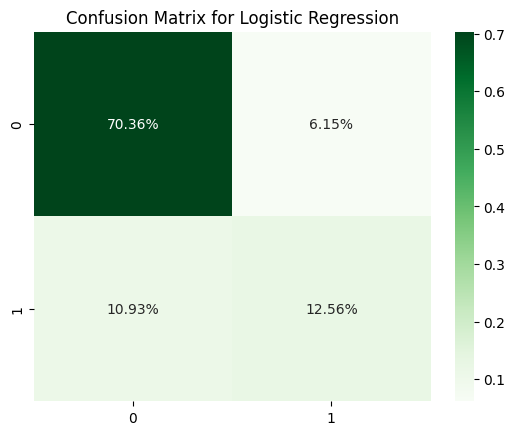

In [53]:
cf2=confusion_matrix(y_test,lr_test_pred)
sns.heatmap((cf2)/np.sum(cf2),annot=True,  fmt='0.2%',cmap='Greens')
plt.title('Confusion Matrix for Logistic Regression')
plt.show

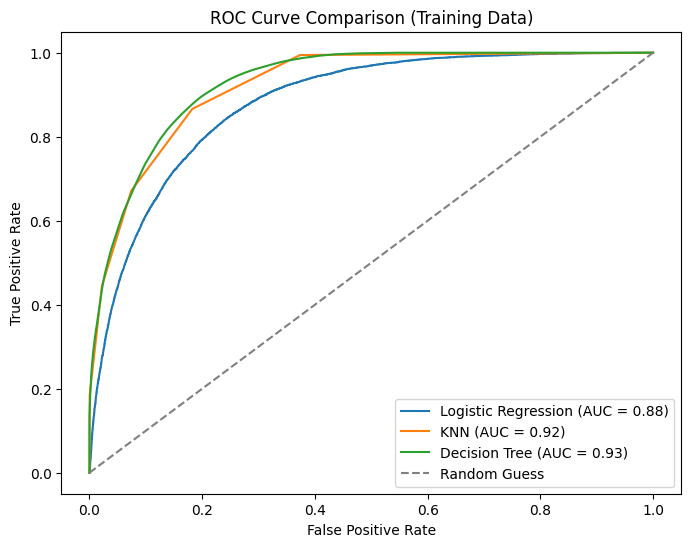

In [54]:
#ROC CURVE COMPARISON FOR TRAIN DATA 
plt.figure(figsize=(8,6))

# Logistic Regression
lr_train_fpr, lr_train_tpr, lr_train_thresholds = roc_curve(y_train, lr_model.predict_proba(X_train)[:,1])
lr_train_auc = roc_auc_score(y_train, lr_model.predict_proba(X_train)[:,1])
plt.plot(lr_train_fpr, lr_train_tpr, label=f'Logistic Regression (AUC = {lr_train_auc:.2f})')

# KNN
knn_train_fpr, knn_train_tpr, knn_train_thresholds = roc_curve(y_train, knn_model.predict_proba(X_train)[:,1])
knn_train_auc = roc_auc_score(y_train, knn_model.predict_proba(X_train)[:,1])
plt.plot(knn_train_fpr, knn_train_tpr, label=f'KNN (AUC = {knn_train_auc:.2f})')

# Decision Tree
dt_train_fpr, dt_train_tpr, dt_train_thresholds = roc_curve(y_train, dt_model.predict_proba(X_train)[:,1])
dt_train_auc = roc_auc_score(y_train, dt_model.predict_proba(X_train)[:,1])
plt.plot(dt_train_fpr, dt_train_tpr, label=f'Decision Tree (AUC = {dt_train_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (Training Data)')
plt.legend()
plt.show()


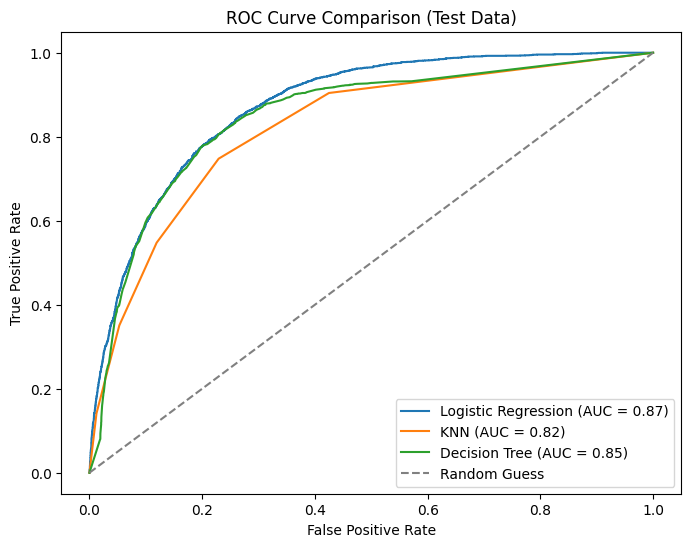

In [55]:
#ROC CURVE COMPARISON FOR TEST DATA
plt.figure(figsize=(8,6))

# Logistic Regression
lr_test_fpr, lr_test_tpr, lr_test_thresholds = roc_curve(y_test, lr_model.predict_proba(X_test)[:,1])
lr_test_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:,1])
plt.plot(lr_test_fpr, lr_test_tpr, label=f'Logistic Regression (AUC = {lr_test_auc:.2f})')

# KNN
knn_test_fpr, knn_test_tpr, knn_test_thresholds = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1])
knn_test_auc = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:,1])
plt.plot(knn_test_fpr, knn_test_tpr, label=f'KNN (AUC = {knn_test_auc:.2f})')

# Decision Tree
dt_test_fpr, dt_test_tpr, dt_test_thresholds = roc_curve(y_test, dt_model.predict_proba(X_test)[:,1])
dt_test_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:,1])
plt.plot(dt_test_fpr, dt_test_tpr, label=f'Decision Tree (AUC = {dt_test_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (Test Data)')
plt.legend()
plt.show()

In [56]:
# saving  performance metrics for each model in a dataframe 
summary_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree'],
    'Train Accuracy': [lr_train_accuracy,knn_train_accuracy,dt_train_accuracy],
    'Test Accuracy': [lr_test_accuracy,knn_test_accuracy,dt_test_accuracy],
    'Train Precision': [lr_train_precision,knn_train_precision,dt_train_precision],
    'Test Precision': [lr_test_precision,knn_test_precision,dt_test_precision],
    'Train Recall': [lr_train_recall,knn_train_recall,dt_train_recall],
    'Test Recall': [lr_test_recall,knn_test_recall,dt_test_recall],
    'Train AUC ROC': [lr_train_auc,knn_train_auc,dt_train_auc],
    'Test AUC ROC': [lr_test_auc,knn_test_auc,dt_test_auc]
                        })
summary_df


,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train AUC ROC,Test AUC ROC
0,Logistic Regression,0.832058,0.829153,0.687070,0.671225,0.553343,0.534641,0.880158,0.872247
1,K-Nearest Neighbors,0.864689,0.802539,0.741159,0.585196,0.671635,0.547712,0.921657,0.821008
2,Decision Tree,0.863102,0.829972,0.764976,0.670247,0.621380,0.543791,0.928714,0.847157


In [60]:
summary_df['F1_train']=(2*summary_df['Train Precision']*summary_df['Train Recall'])/(summary_df['Train Precision']+summary_df['Train Recall'])
summary_df['F1_test']=(2*summary_df['Test Precision']*summary_df['Test Recall'])/(summary_df['Test Precision']+summary_df['Test Recall'])
summary_df

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train AUC ROC,Test AUC ROC,F1_train,F1_test
0,Logistic Regression,0.832058,0.829153,0.687070,0.671225,0.553343,0.534641,0.880158,0.872247,0.612998,0.595198
1,K-Nearest Neighbors,0.864689,0.802539,0.741159,0.585196,0.671635,0.547712,0.921657,0.821008,0.704686,0.565834
2,Decision Tree,0.863102,0.829972,0.764976,0.670247,0.621380,0.543791,0.928714,0.847157,0.685741,0.600433


## Interpretation of the Results:


1. Based on AUC ROC Logistic regression is performing best
2. Based on accuracy Decision tree is performing best
3. Based on F1 score Decision tree is doing best

1. Logistic Regression:
   - Train Accuracy: 0.8320
   - Test Accuracy: 0.8291
   - Train Precision: 0.6870
   - Test Precision: 0.6712
   - Train Recall: 0.5533
   - Test Recall: 0.5346
   - Train AUC ROC: 0.8801
   - Test AUC ROC: 0.8722
   
   The logistic regression model achieves an accuracy of approximately 83% on the training set and 82.91% on the test set. It demonstrates a precision of 68% on the training data and 67% on the test data. The recall values are 55% for training and 53% for testing, indicating that the model is moderately successful in identifying positive instances. The AUC ROC values of 88% for training and 87% for testing suggest that the model has good discriminative power.

2. K-Nearest Neighbors:
   - Train Accuracy: 0.8646
   - Test Accuracy: 0.8025
   - Train Precision: 0.7411
   - Test Precision: 0.5851
   - Train Recall: 0.6716
   - Test Recall: 0.5477
   - Train AUC ROC: 0.9216
   - Test AUC ROC: 0.8210


   The K-Nearest Neighbors model  exhibits an accuracy of around 86% on the training set and 80% on the test set. The precision values are 74% for training and 58% for testing, indicating that the model performs well in predicting positive instances. The recall values are 67% for training and 54% for testing, suggesting that the model is relatively successful in identifying positive instances. The AUC ROC values of 92% for training and 82% for testing indicate that the model has excellent discriminative power.

3. Decision Tree:
   - Train Accuracy: 0.8631
   - Test Accuracy: 0.8299
   - Train Precision: 0.7649
   - Test Precision: 0.6702
   - Train Recall: 0.6213
   - Test Recall: 0.5437
   - Train AUC ROC: 0.9290
   - Test AUC ROC: 0.8485

   The decision tree model achieves an accuracy of approximately 86% on the training set and 83% on the test set. It exhibits precision values of 76% on the training data and 67% on the test data. The recall values are 62% for training and 54% for testing, indicating that the model is relatively successful in identifying positive instances. The AUC ROC values of 92% for training and 84% for testing suggest that the model has good discriminative power.

In summary, the decision tree model demonstrates the highest accuracy and AUC ROC values among the three models, indicating better overall performance and discrimination ability. The KNN model performs well in terms of accuracy and AUC ROC but the gap between test and train is more compared to other models, while logistic regression achieves slightly lower accuracy and AUC ROC scores. The specific strengths and weaknesses of each model can be further analyzed based on precision and recall values.

the choice of the best model depends on various factors such as the specific problem, dataset characteristics, interpretability requirements, and other evaluation metrics. Further analysis and experimentation, including hyperparameter tuning and feature selection, can be performed to optimize the models' performance for the given task.


A drop in recall is generally considered undesirable because it indicates a decrease in the system's ability to identify and retrieve relevant information.Upon removing outliers we could see major drop in recall (47%) but all other performance matrix have almost same.